In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    roc_curve,
    recall_score,
    confusion_matrix,
    precision_score,
    f1_score,
    accuracy_score,
    classification_report

    )

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Dataset for ML/customer churn kaggle/Customer Churn(kaggle).csv')
train_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Sơ lược thông tin về dữ liệu

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
train_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
train_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Gender Distribution


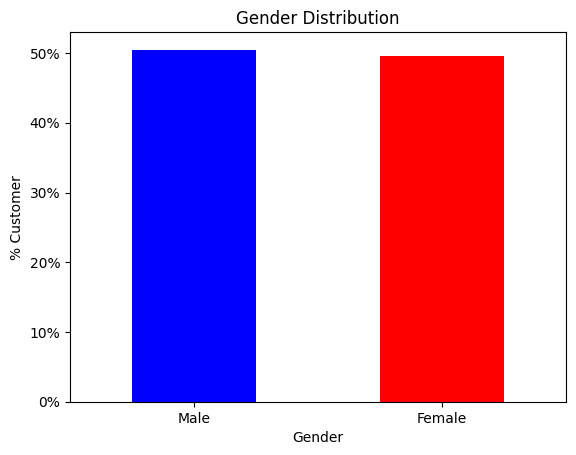

In [ ]:
colors=['blue','red']
ax=(train_data['gender'].value_counts()*100/len(train_data)).plot.bar(rot=0,color=colors)
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customer')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

Marital Status

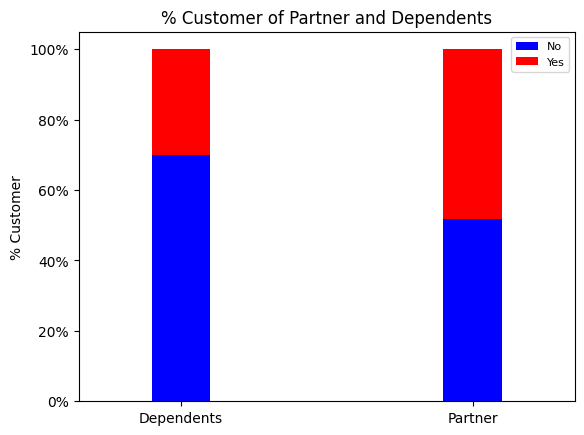

In [ ]:
df=pd.melt(train_data,id_vars='gender',value_vars=['Dependents','Partner'])
df1=df.groupby(['variable','value']).count().unstack()
df2=df1.loc[:,'gender']*100/train_data.shape[0]
colors=['blue','red']
ax=df2.plot.bar(color=colors,stacked=True,rot=0,width=0.2)
ax.set_title('% Customer of Partner and Dependents')
ax.set_ylabel('% Customer')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='upper right',prop={'size':8})

Senior Citizen Distribution

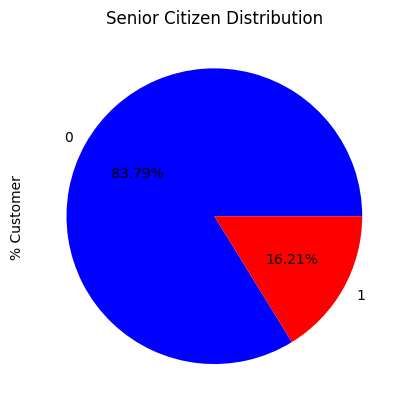

In [ ]:
color=['blue','red']
ax=(train_data['SeniorCitizen'].value_counts()*100/train_data.shape[0]).plot.pie(stacked=True,colors=color,autopct='%1.2f%%')
ax.set_title('Senior Citizen Distribution')
ax.set_ylabel('% Customer')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Contract Types

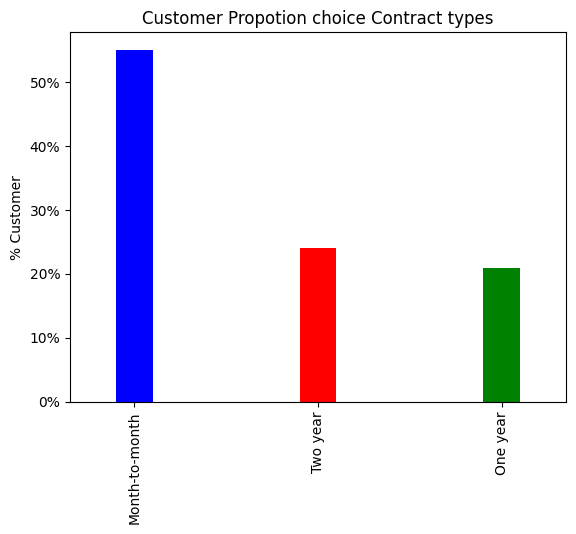

In [ ]:
colors=['blue','red','green']
ax=(train_data['Contract'].value_counts()*100/train_data.shape[0]).plot.bar(stacked=True,rot=90,width=0.2,color=colors)
ax.set_title('Customer Propotion choice Contract types')
ax.set_ylabel('% Customer')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Churn rate


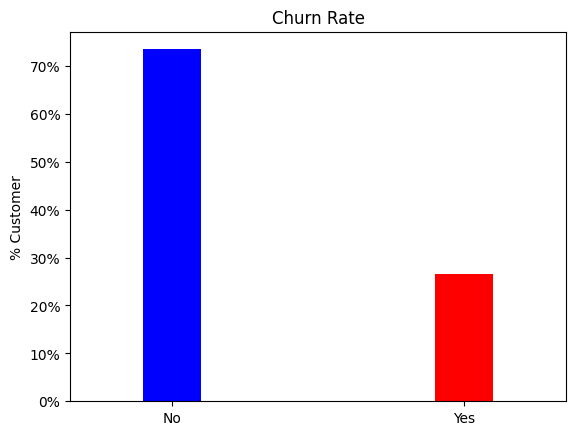

In [ ]:
colors=['blue','red']
ax=(train_data['Churn'].value_counts()*100/train_data.shape[0]).plot.bar(stacked=True,color=colors,rot=0,width=0.2)
ax.set_title('Churn Rate')
ax.set_xlabel('')
ax.set_ylabel('% Customer')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Data transformation and manipulation

In [ ]:
train_data.TotalCharges = pd.to_numeric(train_data.TotalCharges, errors='coerce')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Nhận xét:Ngoài trường 'customerID' thì tất cả các trường còn lại có dtype là object hoàn toàn là dạng categorical và có thể được chuyển đổi thành int hoặc float bằng hàm labelencoder.Chúng ta cần chuyển các trường này về dạng số bất kì khi nào chúng ta có thể

In [ ]:
train_copy=pd.read_csv('/content/drive/MyDrive/Dataset for ML/customer churn kaggle/Customer Churn(kaggle).csv').drop(columns='customerID')
def object_to_int(feature):
    if feature.dtype=='object':
        feature = LabelEncoder().fit_transform(feature)
    return feature
train_copy=train_copy.apply(lambda x: object_to_int(x))
train_copy

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [ ]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


chia tập dữ liệu


In [ ]:
X=train_copy.drop(columns='Churn')
y=train_copy['Churn'].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40,stratify=y)
y_train

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

fit dữ liệu vào model SVM

In [ ]:
clf=SVC(random_state=1)
clf.fit(X_train,y_train)
test_pred=clf.predict(X_test)
print(classification_report(test_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.37      0.42      2113
weighted avg       1.00      0.73      0.85      2113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,test_pred))

[[1552    0]
 [ 561    0]]


Tune Hyper Parameter trong svm


In [ ]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000],
              'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

NameError: ignored

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1000, 'gamma': 1e-05, 'kernel': 'rbf'}
SVC(C=1000, gamma=1e-05)


In [ ]:
grid_test_pred=grid.predict(X_test)
print(classification_report(grid_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1747
           1       0.43      0.65      0.52       366

    accuracy                           0.79      2113
   macro avg       0.67      0.73      0.69      2113
weighted avg       0.83      0.79      0.80      2113



Fit dữ liệu vào model Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
D_Tree_model=DTC()
D_Tree_model.fit(X_train,y_train)
test_pred=D_Tree_model.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1552
           1       0.50      0.53      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.73      0.73      2113



Tune hyper parameter trong model Decision Tree

In [ ]:
para_tune={'max_depth':[3,4,5,6,7,8],
           'min_samples_split':[2,3,4,5,6],
           'max_features':[2,3,4,5]}
grid_DTree_model=GridSearchCV(DTC(),para_tune,refit=True,verbose=3)
grid_DTree_model.fit(X_train,y_train)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=2;, score=0.765 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=2;, score=0.735 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_split=2;, score=0.786 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_split=2;, score=0.748 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_split=2;, score=0.770 total time=   0.0s
[CV 1/5] END max_depth=3, max_features=2, min_samples_split=3;, score=0.752 total time=   0.0s
[CV 2/5] END max_depth=3, max_features=2, min_samples_split=3;, score=0.787 total time=   0.0s
[CV 3/5] END max_depth=3, max_features=2, min_samples_split=3;, score=0.757 total time=   0.0s
[CV 4/5] END max_depth=3, max_features=2, min_samples_split=3;, score=0.734 total time=   0.0s
[CV 5/5] END max_depth=3, max_features=2, min_samples_split=3;, score=0.740 total 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             verbose=3)

In [ ]:
print(grid_DTree_model.best_params_)
print(grid_DTree_model.best_estimator_)

{'max_depth': 8, 'max_features': 5, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=8, max_features=5)


In [ ]:
grid_pred=grid_DTree_model.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1552
           1       0.58      0.49      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



Plot feature importances sau khi tune

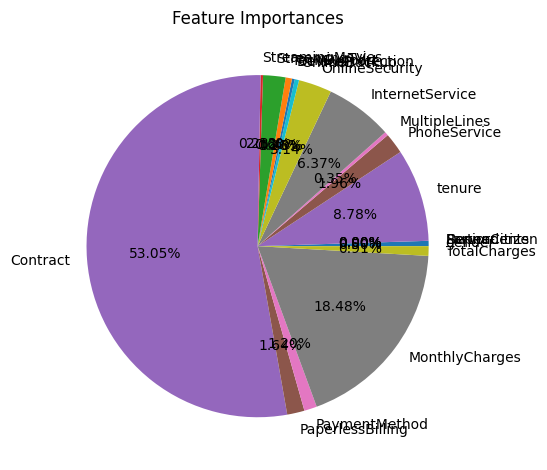

In [ ]:
DTree_Tune_model=DTC(max_depth=6,max_features=3,min_samples_split=6)
DTree_Tune_model.fit(X_train,y_train)
feat_important_tune=DTree_Tune_model.feature_importances_
fig,ax=plt.subplots()
ax.pie(feat_important_tune,labels=X_train.columns,autopct='%1.2f%%')
ax.set_title('Feature Importances')
plt.tight_layout()
plt.show()

Fit dữ liệu vào Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
RF_model=RFC()
RF_model.fit(X_train,y_train)
test_pred=RF_model.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.53      0.58       561

    accuracy                           0.79      2113
   macro avg       0.73      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



Tune hyper parameter với model Random Forest


In [ ]:
para_tune={'n_estimators':[10,100,200],
           'min_samples_split':[2,3,4],
           'max_depth':[3,4,5],
           'criterion':['gini','entropy'],
           'max_features':[2,3,4]}
grid_RF_model=GridSearchCV(RFC(),para_tune,refit=True,verbose=3)
grid_RF_model.fit(X_train,y_train)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=10;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=10;, score=0.767 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=10;, score=0.755 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=10;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=10;, score=0.760 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.764 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=3, max_features=2, min_samples_split=2, n_estimators=100;, score=0.775 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5], 'max_features': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 100, 200]},
             verbose=3)

In [ ]:
print(grid_RF_model.best_params_)
print(grid_RF_model.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=5, max_features=4, n_estimators=200)


In [ ]:
print(classification_report(y_test,grid_RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.67      0.45      0.54       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.70      2113
weighted avg       0.78      0.80      0.78      2113



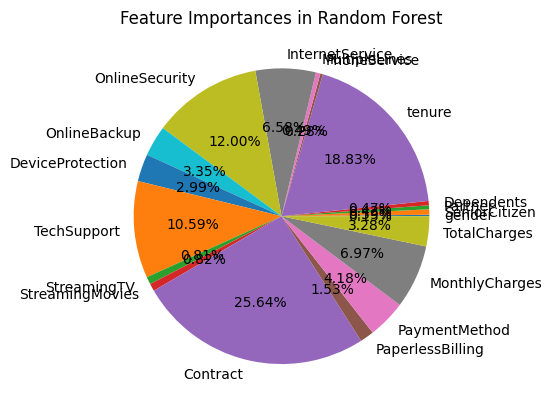

In [ ]:
RF_model_tune=RFC(max_depth=5,max_features=4,n_estimators=200)
RF_model_tune.fit(X_train,y_train)
feature_importances=RF_model_tune.feature_importances_
fig,ax=plt.subplots()
ax.pie(feature_importances,labels=X_train.columns,autopct='%1.2f%%')
ax.set_title('Feature Importances in Random Forest')
plt.show()